# **Random forest on iris dataset**

In [2]:
! pip install kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d uciml/iris


Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0


In [6]:
from zipfile import ZipFile
dataset = '/content/iris.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Species',axis=1),df['Species'],test_size=0.3,random_state=0)

In [11]:
len(X_test)

45

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [20]:
y_predicted = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]])

In [17]:
model.score(X_test,y_test)

1.0

Text(45.722222222222214, 0.5, 'Truth')

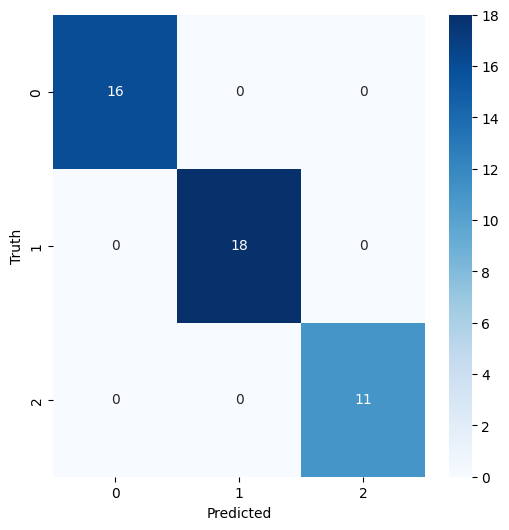

In [24]:
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
accuracy = accuracy_score(y_test, y_predicted)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_predicted))

Accuracy: 1.00

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

